# Consistency

A one-step method with local truncation error $\tau_{i}(h)$ at the $i$th step is said
to be __consistent__ with the differential equation it approximates if 
$$\lim_{h \rightarrow 0} (\max_{1 \leq i \leq N}|\tau_{i}(h)|)=0 $$
where
$$\tau_{i}(h)=\frac{y_{i+1}-y_{i}}{h}-F(t_i,y_i,h,f) $$
As $h \rightarrow 0$ does $F(t_i,y_i,h,f) \rightarrow f(t,y)$. 

All the Runge Kutta, and Adams methods are consistent in this course. This notebook will illustrate a non-consistent method which with great hubris I will call the Abysmal-Butler methods.

## Intial Value Problem
The differential equation
$$ y^{'}=t-y, \ \ (0 \leq t \leq 2) $$
with the initial condition
$$y(0)=1,$$
will be the used to illustrate this.

## Python Libraries

In [1]:
import numpy as np
import math 
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt # side-stepping mpl backend
import matplotlib.gridspec as gridspec # subplots
import warnings
warnings.filterwarnings("ignore")

### Defining the function
$$ f(t,y)=t-y.$$

In [2]:
def myfun_ty(t,y):
    return t-y

## Discrete Interval
Defining the step size  $h$  from the interval range  $a≤t≤b$  and number of steps  $N$ 
$$h=\frac{b−a}{N}.$$
 
This gives the discrete time steps,
$$t_i=t_0+ih,$$
where  $t_0=a.$

Here the interval is  $0≤t≤2$  and number of step  4 
$$h=\frac{2−0}{40}=0.05.$$
 
This gives the discrete time steps,
$$t_i=0+i0.5,$$
for  $i=0,1,⋯,40.$

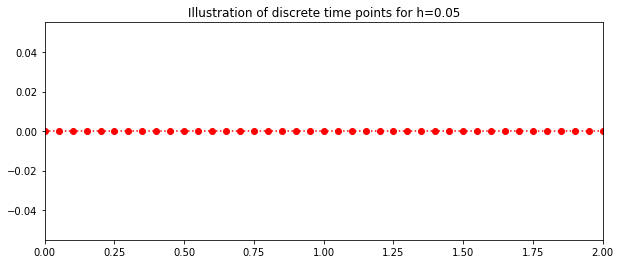

In [3]:
# Start and end of interval
b=2
a=0
# Step size
N=40
h=(b-a)/(N)
t=np.arange(a,b+h,h)
fig = plt.figure(figsize=(10,4))
plt.plot(t,0*t,'o:',color='red')
plt.xlim((0,2))
plt.title('Illustration of discrete time points for h=%s'%(h))
plt.show()

## Exact Solution
THe initial value problem has the exact solution
$$y(t)=2e^{-t}+t-1.$$
The figure below plots the exact solution.

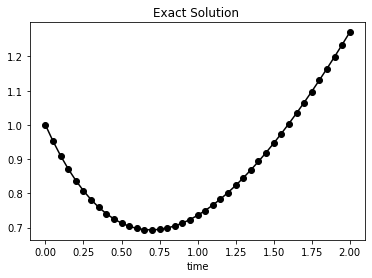

In [4]:
IC=1 # Intial condtion
y=(IC+1)*np.exp(-t)+t-1
fig = plt.figure(figsize=(6,4))
plt.plot(t,y,'o-',color='black')
plt.title('Exact Solution ')
plt.xlabel('time')
plt.show()

In [5]:
# Initial Condition
w=np.zeros(N+1)
#np.zeros(N+1)
w[0]=IC



## 2-step Abysmal Butler Method 

The 2-step Abysmal Butler difference equation is
$$w_{i+1} = w_{i} + \frac{h}{2}(4f(t_i,w_i)-3f(t_{i-1},w_{i-1})) $$

For $i=0$ the system of difference equation is:
$$w_{1} = w_{0} + \frac{h}{2}(4(t_0-w_0)-3(t_{-1}-w_{-1})) $$
this is not solvable as <font color='red'> $w_{-1}$ </font> is unknown.

For $i=1$ the difference equation is:
$$w_{2} = w_{1} + \frac{h}{2}(4(t_1-w_1)-3(t_{0}-w_{0})) $$
this is not solvable as <font color='red'> $w_{1}$  </font> is unknown. $w_1$ can be  approximated using a one step method. Here, as the exact solution is known,
$$w_1=2e^{-t_1}+t_1-1.$$


In [6]:
### Initial conditions
w=np.zeros(len(t))
w0=np.zeros(len(t))
w[0]=IC
w[1]=y[1]

### Loop

In [7]:
for k in range (1,N):
    w[k+1]=(w[k]+h/2.0*(4*myfun_ty(t[k],w[k])-3*myfun_ty(t[k-1],w[k-1])))   


### Plotting solution

In [8]:
def plotting(t,w,y):
    fig = plt.figure(figsize=(10,4))
    plt.plot(t,y, 'o-',color='black',label='Exact')
    plt.plot(t,w,'^:',color='red',label='Abysmal-Butler')
    plt.xlabel('time')
    plt.legend()
    plt.show 

The plot below shows the exact solution (black) and the Abysmal-Butler approximation (red) of the intial value problem

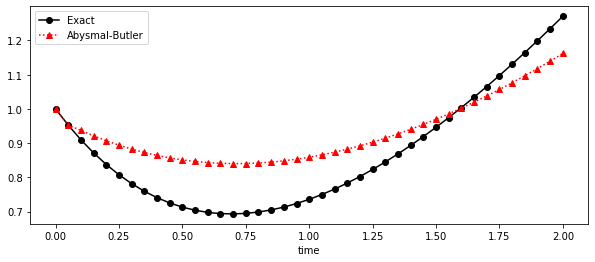

In [9]:
plotting(t,w,y)

## Consistency 
The Abysmal-Butler method does not satisfy the consistency condition
$$\tau_{i}(h)=\frac{y_{i+1}-y_{i}}{h}-\frac{1}{2}[4(f(t_i,y_i)-3f(t_{i-1},y_{i-1})] $$
As $h \rightarrow 0$  $$\frac{1}{2}[4(f(t_i,y_i)-3f(t_{i-1},y_{i-1})] \rightarrow \frac{f(t_i,y_i)}{2}.$$
While as $h \rightarrow 0$  $$\frac{y_{i+1}-y_{i}}{h} \rightarrow y^{'}=f(t_i,y_i).$$
Hence as $h \rightarrow 0$ $$\frac{y_{i+1}-y_{i}}{h}-\frac{1}{2}[4(f(t_i,y_i)-3f(t_{i-1},y_{i-1})]\rightarrow f(t_i,y_i)-\frac{f(t_i,y_i)}{2}=\frac{f(t_i,y_i)}{2},$$
which violates the consistency condition (inconsistent).


In [24]:
d = {'time': t[0:5], 'Abysmal Butler': w[0:5],'Exact':y[0:5],'Error':np.abs(y[0:5]-w[0:5])}
df = pd.DataFrame(data=d)
df

,time,Abysmal Butler,Exact,Error
0,0.00,1.000000,1.000000,0.000000
1,0.05,0.952459,0.952459,0.000000
2,0.10,0.937213,0.909675,0.027538
3,0.15,0.921176,0.871416,0.049760
4,0.20,0.906849,0.837462,0.069388
